# Données nationales quotidiennes de l’OFSP

L’OFSP actualise quotidiennement plusieurs tableaux de données sur le covid, listés [dans cette page](https://www.bag.admin.ch/bag/fr/home/krankheiten/ausbrueche-epidemien-pandemien/aktuelle-ausbrueche-epidemien/novel-cov/situation-schweiz-und-international.html).

Dans ce notebook, on va d’abord analyser les données du fichier Excel «[Données du rapport de situation pour le coronavirus](https://www.bag.admin.ch/dam/bag/fr/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-datengrundlage-lagebericht.xlsx.download.xlsx/200325_base%20de%20données_graphiques_COVID-19-rapport.xlsx)» pour comprendre ses faiblesses.

Commencez par ouvrir ce fichier dans Excel, Calc, Google Spreadsheet ou autre pour voir ce qui peut poser problème, en particulier les notes… Exemple:
> La date du cas correspond généralement à la date de prélèvement de l'échantillon.

D’après l’OFSP, ces données correspondent à celles de ses [rapports quotidiens en PDF](https://www.bag.admin.ch/dam/bag/fr/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-lagebericht.pdf.download.pdf/COVID-19_Situation_epidemiologique_en_Suisse.pdf).


Dans un deuxième temps, on utilisera le fichier «[Données chiffrées sur les tests réalisés](https://www.bag.admin.ch/dam/bag/fr/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-basisdaten-labortests.xlsx.download.xlsx/Dashboard_3_COVID19_labtests_positivity.xlsx)» pour mesurer l’impact de la manière de tester sur les chiffres quotidiens.

In [1]:
# pandas, notre module de traitement des données
import pandas as pd

# permet de traiter et comparer des dates
from datetime import datetime, timedelta

# 1. Cas et décès en Suisse

In [2]:
# On charge le fichier Excel de l’OFSP en sautant les 6 lignes de métadonnées
df = pd.read_excel('https://www.bag.admin.ch/dam/bag/fr/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-datengrundlage-lagebericht.xlsx.download.xlsx/200325_base%20de%20donn%C3%A9es_graphiques_COVID-19-rapport.xlsx', skiprows=6)

In [3]:
# Voyons à quoi ça ressemble...
df.head()

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
0,2020-02-24,1,1,5,5,NaN,NaN
1,2020-02-25,1,2,4,9,NaN,NaN
2,2020-02-26,10,12,9,18,NaN,NaN
3,2020-02-27,10,22,4,22,NaN,NaN
4,2020-02-28,10,32,5,27,NaN,NaN


In [4]:
# Combien de lignes en tout?
len(df)

226

In [5]:
# Voir la fin du tableau
df.tail()

,Date,Nombre de cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nombre de décés,"Nombre de décés, cumulé"
221,2020-10-02,667,55353,9,4729,0.0,1787.0
222,2020-10-03,500,55853,9,4738,0.0,1787.0
223,2020-10-04,309,56162,5,4743,0.0,1787.0
224,2020-10-05,470,56632,1,4744,0.0,1787.0
225,2020-10-06,0,56632,0,4744,0.0,1787.0


In [6]:
# Si on additionne les cas quotidiens, on constate que l’OFSP cumule les cas depuis le début
df['Nombre de cas'].sum()

56632

In [7]:
# «Nombre de cas» n’est pas clair. On renomme cette colonne, de même que «Nombre de décès»:
df.rename(columns={"Nombre de décés": "Nouveaux décès", "Nombre de cas": "Nouveaux cas"}, inplace=True)

In [8]:
# On indique à Pandas que la colonne «Date» est une date
df['timestamp'] = pd.to_datetime(df['Date'])

### Les valeurs des derniers jours

Problème courant dans des stats «rapides»: les trois derniers jours ont des valeurs provisoires. Et surtout, le premier correspond – je suppose – aux tests dont les résultats sont arrivés entre minuit et 8h du matin. Je ne sais pas pourquoi l’OFSP communique cette valeur.

On devra l’exclure pour ne pas fausser nos graphiques.

In [11]:
df.tail()

,Date,Nouveaux cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nouveaux décès,"Nombre de décés, cumulé",timestamp
221,2020-10-02,667,55353,9,4729,0.0,1787.0,2020-10-02
222,2020-10-03,500,55853,9,4738,0.0,1787.0,2020-10-03
223,2020-10-04,309,56162,5,4743,0.0,1787.0,2020-10-04
224,2020-10-05,470,56632,1,4744,0.0,1787.0,2020-10-05
225,2020-10-06,0,56632,0,4744,0.0,1787.0,2020-10-06


In [12]:
# Générer automatiquement la date du jour et de la veille
today_timestamp = datetime.now().strftime('%Y-%m-%d')
yesterday_timestamp = ( datetime.now() - timedelta(days=1) ).strftime('%Y-%m-%d')
print(f'On est le {today_timestamp} et hier on était le {yesterday_timestamp}, si je me trompe pas (après tout je suis qu’une machine)')

On est le 2020-10-06 et hier on était le 2020-10-05, si je me trompe pas (après tout je suis qu’une machine)


**NB** Depuis quelques semaines, l’OFSP ne publie plus de rapports ni de tableaux le week-end. Si vous exécutez les lignes suivantes un samedi, un dimanche ou un lundi matin, c’est donc normal que rien ne s’affiche…

In [13]:
# Cas du jour. En semaine après 14h, l’OFSP publie en général un chiffre entre zéro et un… En fait, ça n’inclut qu’une petite partie de la journée
df[df['timestamp'] == today_timestamp]

,Date,Nouveaux cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nouveaux décès,"Nombre de décés, cumulé",timestamp
225,2020-10-06,0,56632,0,4744,0.0,1787.0,2020-10-06


In [14]:
# Cas de la veille. Le matin, c’est aussi un chiffre qui ne veut rien dire.
df[df['timestamp'] == yesterday_timestamp]

,Date,Nouveaux cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nouveaux décès,"Nombre de décés, cumulé",timestamp
224,2020-10-05,470,56632,1,4744,0.0,1787.0,2020-10-05


In [15]:
# On utilise la date comme «index» du tableau: ça nous permettra d’afficher des jours / des périodes précises
df.index = df['timestamp']

In [16]:
# Code un peu bavard pour prendre le dernier jour avec des données qui semblent complète.
# Evidemment, on espère qu’un jour on pourra considérer comme correct le fait d’avoir 3 nouveaux cas ou moins...

for i in range(0, 5):
    delta = ( datetime.now() - timedelta(days=i) ).strftime('%Y-%m-%d')
    last_value = df[:delta]['Nouveaux cas'].values[-1]
    condition_met = last_value > 3
    condition_met_string = 'est remplie' if condition_met else 'n’est pas remplie'
    print(f'Si on s’arrête au {delta}, la dernière valeur est {last_value}. Notre condition {condition_met_string}.')
    if condition_met:
        # On coupe les dernières valeurs
        print(f'On s’arrête donc au {delta}...')
        df = df[:delta].copy()
        break

Si on s’arrête au 2020-10-06, la dernière valeur est 0. Notre condition n’est pas remplie.
Si on s’arrête au 2020-10-05, la dernière valeur est 470. Notre condition est remplie.
On s’arrête donc au 2020-10-05...


## Un peu de statistique descriptive

On peut utiliser différentes méthodes pour analyser les données, en voici quelques exemples.

In [17]:
df['Nouveaux cas'].describe()

count     225.000000
mean      251.697778
std       293.981333
min         1.000000
25%        41.000000
50%       144.000000
75%       350.000000
max      1464.000000
Name: Nouveaux cas, dtype: float64

#### Quantiles

In [18]:
df.quantile(q=0.2)['Nouveaux cas']

32.800000000000004

In [19]:
df.quantile(q=0.95)['Nouveaux cas']

998.3999999999985

#### Mesures de la dispersion

In [20]:
df['Nouveaux cas'].var()

86425.02432539682

In [21]:
df['Nouveaux cas'].std()

293.98133329413423

# 2. Visualiser les données

In [1]:
# matplotlib permet de générer des graphiques
import matplotlib.pyplot as plt

# on affiche les graphiques directement dans le notebook (et pas dans une fenêtre séparée)
%matplotlib inline

# on choisit un style de graphique.
# Liste des principaux styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-poster')

# taille par défaut de nos graphiques
plt.rcParams["figure.figsize"] = [10, 5]

# police de caractères pour les graphiques
plt.rcParams['font.family'] = "Gill Sans MT"

# cette ligne permettra d’éditer le texte des graphiques qu’on exporte en PDF,
# par exemple dans Inkscape ou Adobe Illustrator
plt.rcParams['pdf.fonttype'] = 42

# Mois en français dans les graphiques
# Possible si la locale fr_FR.UTF-8 est déjà installée
# ou si on a les droits admin pour l’installer avec "sudo locale-gen fr_FR.UTF-8"
# locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')

<AxesSubplot:xlabel='timestamp'>

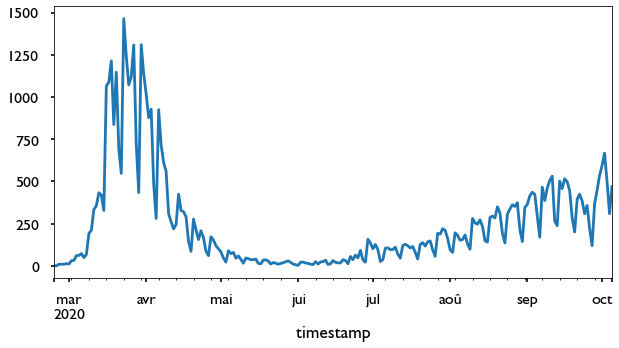

In [23]:
df['Nouveaux cas'].plot()

<AxesSubplot:>

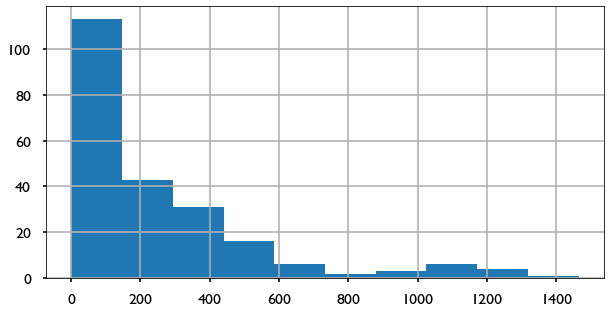

In [24]:
# Un histogramme pour voir comment une variable est répartie
df['Nouveaux cas'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa83eb4d910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa83eb5c0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa83eb4d5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa83eb5c610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa83eb5c970>],
 'means': []}

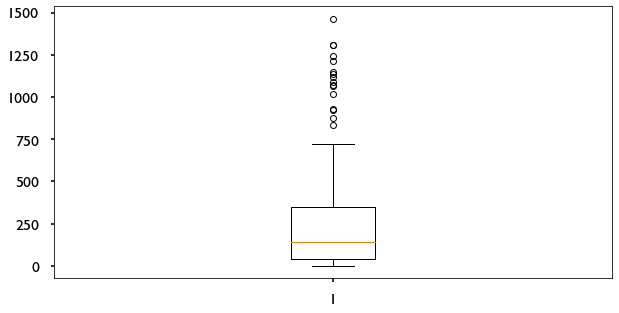

In [25]:
# Une petite boîte à moustache – à quoi ça sert?
plt.boxplot(df['Nouveaux cas'])

# Des problèmes temporels

Si on regarde de plus près nos fluctuations, qu’est-ce qu’on constate?

<AxesSubplot:title={'center':'Du lundi 5 au dimanche 11 avril'}, xlabel='timestamp'>

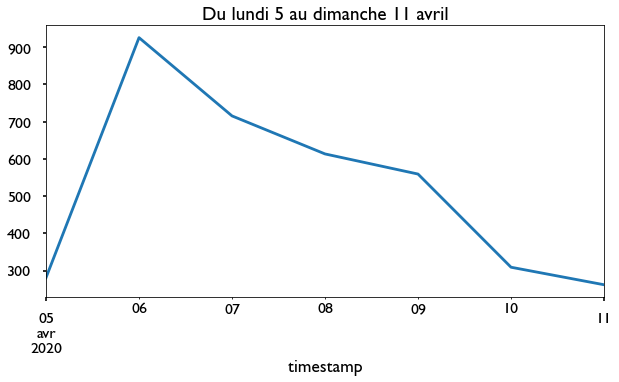

In [27]:
df['2020-04-05':'2020-04-11']['Nouveaux cas'].plot(title='Du lundi 5 au dimanche 11 avril')

<AxesSubplot:title={'center':'Du lundi 5 au dimanche 26 avril'}, xlabel='timestamp'>

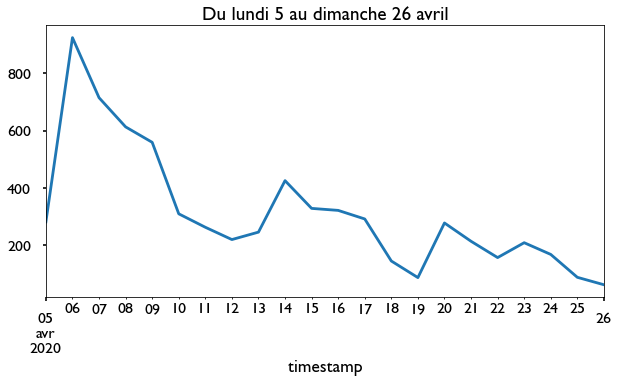

In [28]:
df['2020-04-05':'2020-04-26']['Nouveaux cas'].plot(title='Du lundi 5 au dimanche 26 avril')

([<matplotlib.axis.XTick at 0x7fb0e8be0ca0>,
 [Text(0, 0, 'Lundi'),
  Text(1, 0, 'Mardi'),
  Text(2, 0, 'Mercredi'),
  Text(3, 0, 'Jeudi'),
  Text(4, 0, 'Vendredi'),
  Text(5, 0, 'Samedi'),
  Text(6, 0, 'Dimanche')])

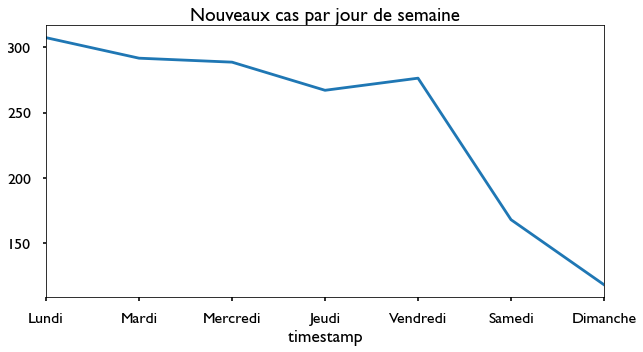

In [29]:
df.groupby(df.index.weekday)['Nouveaux cas'].mean().plot(title='Nouveaux cas par jour de semaine')

plt.xticks(range(0, 7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])  

## Eh oui, le covid se repose le week-end!
C’est pour ça que, chaque lundi, on a une flambée de nouveaux cas.

# Aplanir les fluctuations
Maintenant qu’on sait que ces creux des week-ends n’ont aucun sens, comment rendre lisible l’évolution du nombre de cas?

Voici deux méthodes possibles pour les lisser:
* Découper ces valeurs par semaine, et non par jour. On va additionne donc les jours de la semaine. Comme pour les données données par l’OFSP pour le matin-même, attention à faire en sorte que la dernière semaine soit complète, sans quoi le graphique induira en erreur
* Utiliser une moyenne mobile, comme ça se fait beaucoup pour les cours de bourse: pour chaque jour, on fait la moyenne avec les n jours précédents et suivants

<AxesSubplot:title={'center':'Moyenne mobile sur 7 jours'}, xlabel='timestamp'>

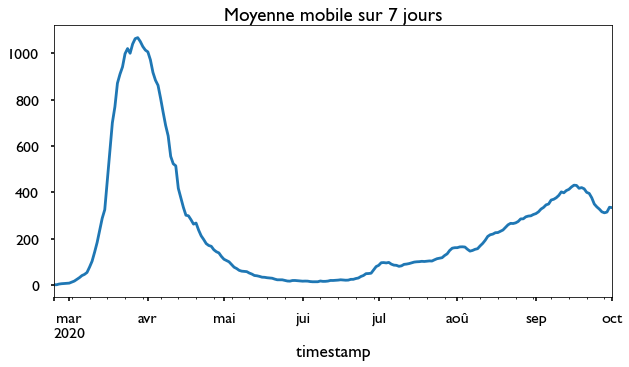

In [30]:
df.rolling('7d')['Nouveaux cas'].mean().plot(title='Moyenne mobile sur 7 jours')

In [31]:
df

,Date,Nouveaux cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nouveaux décès,"Nombre de décés, cumulé",timestamp
timestamp,,,,,,,,
2020-02-24,2020-02-24,1,1,5,5,NaN,NaN,2020-02-24
2020-02-25,2020-02-25,1,2,4,9,NaN,NaN,2020-02-25
2020-02-26,2020-02-26,10,12,9,18,NaN,NaN,2020-02-26
2020-02-27,2020-02-27,10,22,4,22,NaN,NaN,2020-02-27
2020-02-28,2020-02-28,10,32,5,27,NaN,NaN,2020-02-28
...,...,...,...,...,...,...,...,...
2020-09-27,2020-09-27,120,52743,10,4676,0.0,1782.0,2020-09-27
2020-09-28,2020-09-28,365,53108,6,4682,2.0,1784.0,2020-09-28
2020-09-29,2020-09-29,447,53555,11,4693,0.0,1784.0,2020-09-29


<AxesSubplot:title={'center':'MAUVAIS GRAPHIQUE des nouveaux cas par semaine'}, xlabel='timestamp'>

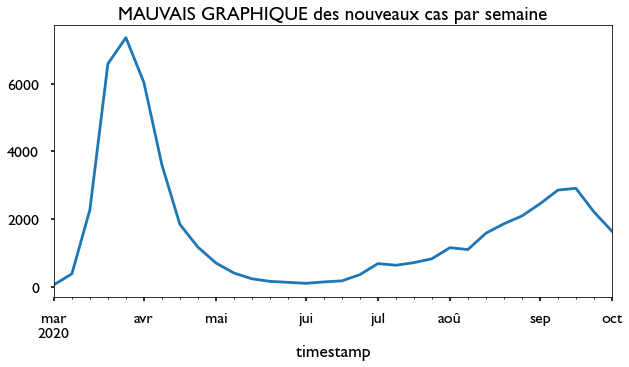

In [32]:
# Un mauvais graphique hebdomadaire: démarre le dimanche et prend une dernière semaine partielle
df.resample('W')['Nouveaux cas'].sum().plot(title='MAUVAIS GRAPHIQUE des nouveaux cas par semaine')

In [33]:
today = datetime.now()
last_monday = (today + timedelta(days=-today.weekday())).strftime('%Y-%m-%d')
print(f'Le dernier lundi est: {last_monday}')

Le dernier lundi est: 2020-09-28


In [34]:
df_week = pd.DataFrame(df[df['timestamp'] < last_monday].resample("W", label='left', loffset=pd.DateOffset(days=1))['Nouveaux cas'].sum())

In [35]:
# Est-ce que c’est correct? On vérifie «à la main»
df_week.tail()

,Nouveaux cas
timestamp,
2020-08-23,2091
2020-08-30,2448
2020-09-06,2855
2020-09-13,2908
2020-09-20,2212


<AxesSubplot:title={'center':'BON GRAPHIQUE des cas par semaine'}, xlabel='timestamp'>

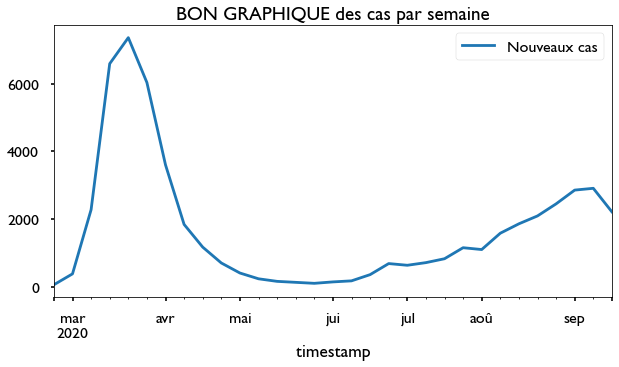

In [36]:
df_week.plot(title='BON GRAPHIQUE des cas par semaine')

# Croiser avec les tests

On a bien bossé, mais ce graphique ne nous dit pas grand chose. Où est le nombre de tests? Combien de décès compte-t-on?

Déjà, on a un problème si on veut montrer les cas et les décès dans un seul graphique: leur ampleur est totalement différente. On compte environ 30 fois plus de cas que de décès (heureusement).

In [37]:
df['Nouveaux cas'].sum() / df['Nouveaux décès'].sum()

30.483744394618835

array([[<AxesSubplot:title={'center':'Nouveaux cas'}>,
        <AxesSubplot:title={'center':'Nouveaux décès'}>]], dtype=object)

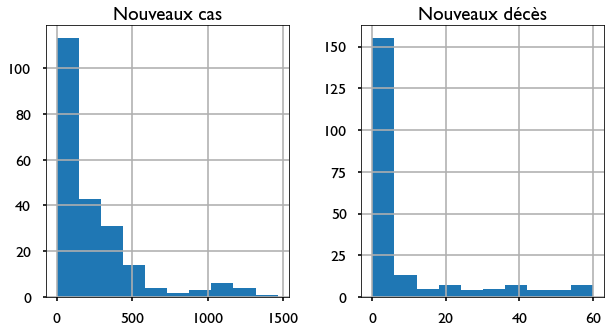

In [38]:
df[['Nouveaux cas', 'Nouveaux décès']].hist()

Une **échelle logarithmique** nous permet de représenter des données qui ont un ordre de grandeur différent. De nouveau, on fait face à des fluctuations liés à la manière de collecter les données.

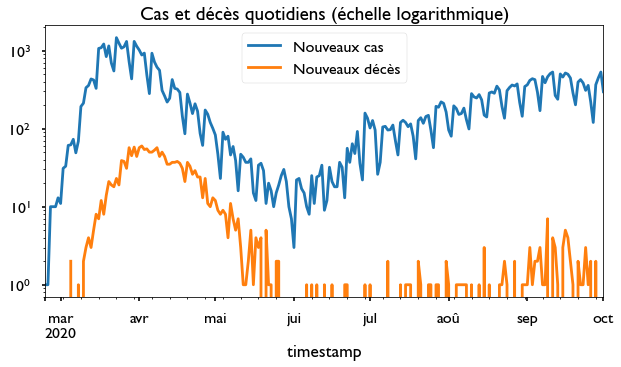

In [39]:
ax = df[['Nouveaux cas', 'Nouveaux décès']].plot(title='Cas et décès quotidiens (échelle logarithmique)')

ax.set_yscale('log')

Pour le moment, on se contente de ces fluctuations mais on va ajouter **les tests** réalisés, sachant qu’un cas confirmé correspond à une personne dont le test a été positif. (Mais plusieurs tests peuvent concerner la même personne)

In [40]:
df_tests = pd.read_excel('https://www.bag.admin.ch/dam/bag/fr/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-basisdaten-labortests.xlsx.download.xlsx/Dashboard_3_COVID19_labtests_positivity.xlsx')

# Renommage rapide des colonnes. Il faut plutôt utiliser df.rename() au cas où l’OFSP change l’ordre de ses colonnes, mais j’ai un peu la flemme pour cet exemple
df_tests.columns = ['replikation_dt', 'timestamp', 'number of tests', 'outcome']
df_tests.head()

,replikation_dt,timestamp,number of tests,outcome
0,2020-10-02 08:15:30,2020-01-24,0,Positive
1,2020-10-02 08:15:30,2020-01-24,3,Negative
2,2020-10-02 08:15:30,2020-01-25,0,Positive
3,2020-10-02 08:15:30,2020-01-25,4,Negative
4,2020-10-02 08:15:30,2020-01-27,0,Positive


In [41]:
# On s’intéresse uniquement au nombre de tests. Donc on regroupe par date les tests positifs et négatifs.
dft = pd.DataFrame(df_tests.groupby('timestamp')['number of tests'].sum())
dft.reset_index(inplace=True)
dft.head()

,timestamp,number of tests
0,2020-01-24,3
1,2020-01-25,4
2,2020-01-27,13
3,2020-01-28,16
4,2020-01-29,29


In [42]:
# Et on ajoute ça à notre tableau de données initial.
dfm = df.reset_index(drop=True).merge(dft, on='timestamp')
dfm.index = dfm['timestamp']
dfm.rename(columns={'number of tests': 'Nombre de tests'}, inplace=True)
dfm.head()

,Date,Nouveaux cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nouveaux décès,"Nombre de décés, cumulé",timestamp,Nombre de tests
timestamp,,,,,,,,,
2020-02-24,2020-02-24,1,1,5,5,NaN,NaN,2020-02-24,48
2020-02-25,2020-02-25,1,2,4,9,NaN,NaN,2020-02-25,170
2020-02-26,2020-02-26,10,12,9,18,NaN,NaN,2020-02-26,317
2020-02-27,2020-02-27,10,22,4,22,NaN,NaN,2020-02-27,279
2020-02-28,2020-02-28,10,32,5,27,NaN,NaN,2020-02-28,450


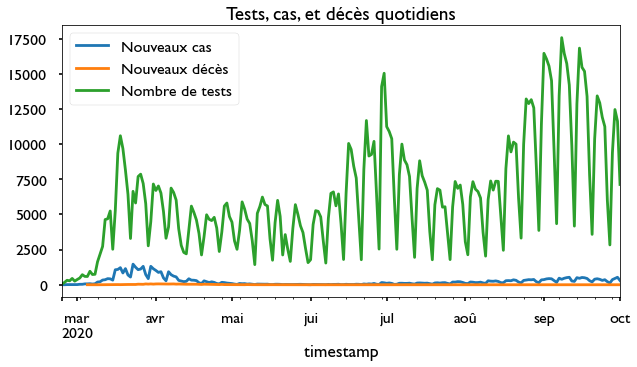

In [43]:
# Sans échelle logarithmique, on n’y voit rien…
ax = dfm[['Nouveaux cas', 'Nouveaux décès', 'Nombre de tests']].plot(title='Tests, cas, et décès quotidiens')

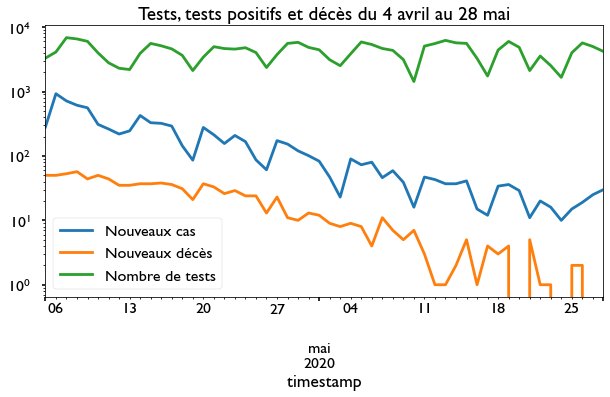

In [44]:
# On voit bien l’impact du nombre plus faible de tests faits ou analysés le week-end
ax = dfm['2020-04-05':'2020-05-28'][['Nouveaux cas', 'Nouveaux décès', 'Nombre de tests']].plot(title='Tests, tests positifs et décès du 4 avril au 28 mai')
ax.set_yscale('log')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


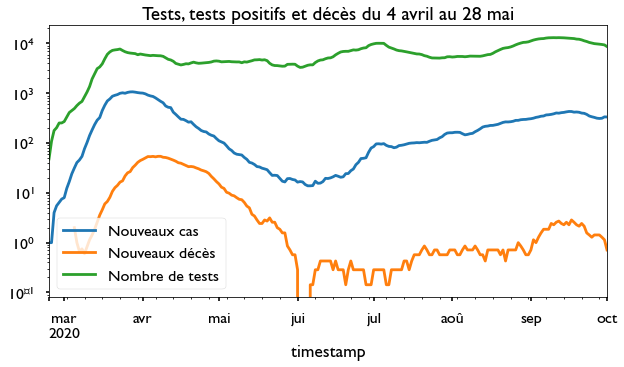

In [45]:
ax = dfm.rolling('7d')[['Nouveaux cas', 'Nouveaux décès', 'Nombre de tests']].mean().plot(title='Tests, tests positifs et décès du 4 avril au 28 mai')

ax.set_yscale('log')

#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')
#ax.minorticks_off()

# Bonus 1:  comparer différentes séries entre elles

In [52]:
taux_tests_positifs = round(100 * dfm['Nouveaux cas'].sum() / dfm['Nombre de tests'].sum(), 1)
print(f'Le taux de tests positifs, depuis le 24 février, est de {taux_tests_positifs}%')

Le taux de tests positifs, depuis le 24 février, est de 3.9%


Ok, mais comment ce taux a-t-il évolué? (Question subsidiaire: et quelles sont les différences par canton? Pour le savoir, il faudrait demander des données plus détaillées à l’OFSP, qui n’est pas très partageur)

In [53]:
dfm['Taux de cas positifs'] = round(100 * dfm['Nouveaux cas'] / dfm['Nombre de tests'], 1)

<AxesSubplot:xlabel='timestamp'>

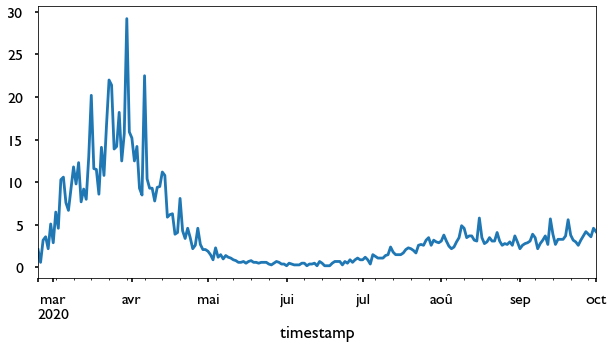

In [54]:
dfm['Taux de cas positifs'].plot()

In [70]:
# Impressionnant maximum de 29,2%
print( 'Taux maximum: {}% / {}'.format( dfm['Taux de cas positifs'].max(), dfm['Taux de cas positifs'].idxmax().strftime('%A %d %B %Y') ) )

Taux maximum: 29.2% / Lundi 30 mars 2020


Médiane: 2.8


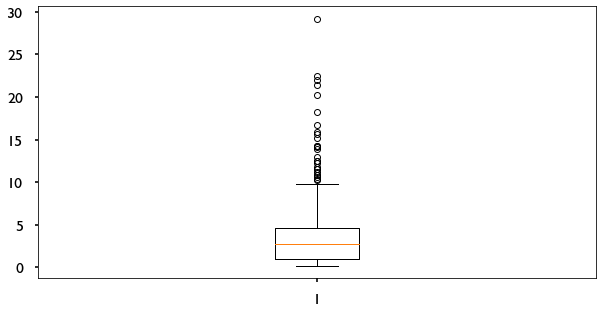

In [75]:
# Mais la médiane est à 2.8%
print('Médiane:', dfm['Taux de cas positifs'].median())
_ = plt.boxplot(dfm['Taux de cas positifs'])

In [79]:
# Les dix taux les plus élevés
dfm.sort_values('Taux de cas positifs', ascending=False).head(10)

,Date,Nouveaux cas,"Nombre de cas, cumulé",Nombre de cas hospitalisés,"Nombre de cas hospitalisés, cumulé",Nouveaux décès,"Nombre de décés, cumulé",timestamp,Nombre de tests,Taux de cas positifs
timestamp,,,,,,,,,,
2020-03-30,2020-03-30,1310,17975,164,2642,58.0,437.0,2020-03-30,4489,29.2
2020-04-06,2020-04-06,925,23626,72,3212,50.0,807.0,2020-04-06,4112,22.5
2020-03-23,2020-03-23,1464,10766,161,1485,23.0,150.0,2020-03-23,6640,22.0
2020-03-24,2020-03-24,1244,12010,181,1666,19.0,169.0,2020-03-24,5813,21.4
2020-03-16,2020-03-16,1065,3775,118,613,7.0,35.0,2020-03-16,5279,20.2
2020-03-27,2020-03-27,1308,15508,207,2235,31.0,277.0,2020-03-27,7197,18.2
2020-03-22,2020-03-22,548,9302,134,1324,18.0,127.0,2020-03-22,3289,16.7
2020-03-31,2020-03-31,1137,19112,125,2767,44.0,481.0,2020-03-31,7160,15.9
2020-03-29,2020-03-29,434,16665,121,2478,45.0,379.0,2020-03-29,2767,15.7


<AxesSubplot:xlabel='timestamp'>

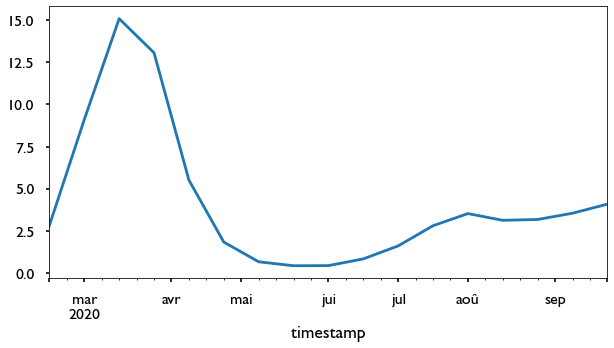

In [85]:
# Regroupement par une ou deux semaines. On comprend mieux l’évolution du taux
dfm.resample('2W', label='left', loffset=pd.DateOffset(days=1))['Taux de cas positifs'].mean().plot()

<AxesSubplot:xlabel='timestamp'>

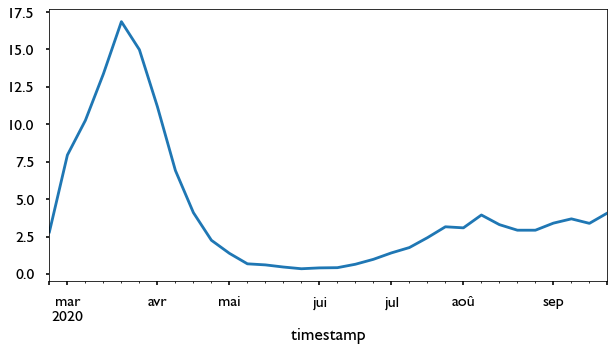

In [86]:
dfm.resample('W', label='left', loffset=pd.DateOffset(days=1))['Taux de cas positifs'].mean().plot()

<AxesSubplot:xlabel='timestamp'>

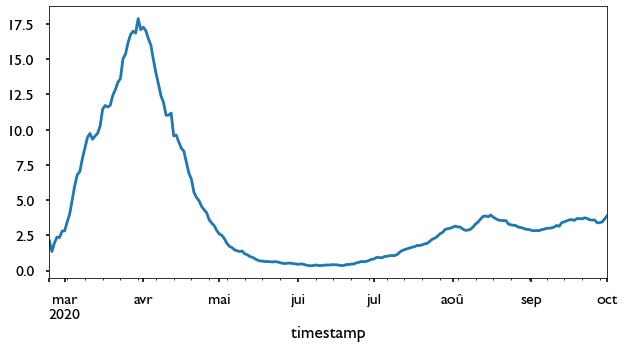

In [87]:
# Ou, encore, une moyenne mobile
dfm.rolling('7d')['Taux de cas positifs'].mean().plot()

# Bonus 2: comparer la même série à différentes dates

Un exemple: le **taux de croissance** / **growth rate**

In [96]:
df['Nouveaux cas (lissé)'] = df['Nouveaux cas'].rolling('7d').mean()

Pas besoin de se casser la nénette, Pandas inclut cette fonction pour nous: `pct_change()`…

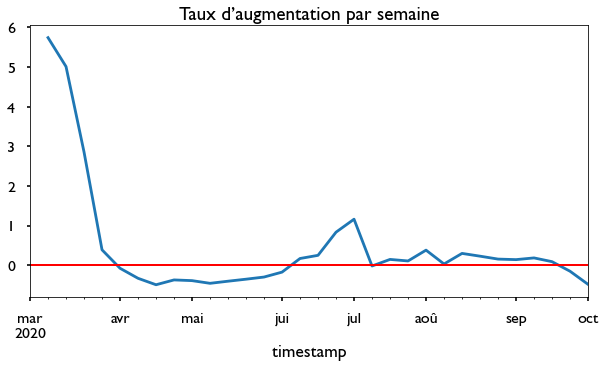

In [112]:
df.resample('W').sum()['Nouveaux cas (lissé)'].pct_change().plot(title = 'Taux d’augmentation par semaine')
plt.axhline(linewidth=2, color='r')

La même chose en se cassant la nénette

In [138]:
from math import nan
rows = []
last_value = nan
for index, value in df.resample('W')['Nouveaux cas (lissé)'].sum().iteritems():
    # Eh oui, on calcule simplement le pourcentage d’augmentation,
    # mais on le fait plus de 200 fois dans une boucle
    growth_rate = (value - last_value) / last_value
    rows.append({'timestamp': index, 'rate': growth_rate})
    last_value = value
df_growth = pd.DataFrame(rows)
df_growth.set_index('timestamp', inplace=True)
df_growth.head()

,rate
timestamp,
2020-03-01,NaN
2020-03-08,5.740804
2020-03-15,5.010787
2020-03-22,2.855906
2020-03-29,0.388452


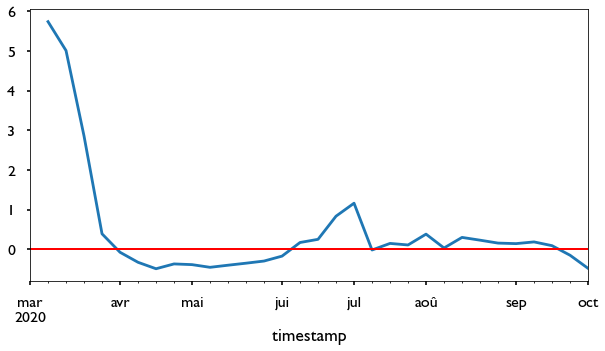

In [139]:
# Le graphique devrait être pareil.
# Il y a sûrement de très légères différences qu’on pourrait trouver en comparant les valeurs avec des «==»
df_growth['rate'].plot()
plt.axhline(linewidth=2, color='r')

# Bonus 3

**Qu’est-ce qu’on peut dire des visualisations de l’OFSP?** Quels sont leurs points forts et points faibles?

1. [Répartition par canton, âge et sexe](https://covid-19-schweiz.bagapps.ch/fr-1.html)
2. [Évolution dans le temps](https://covid-19-schweiz.bagapps.ch/fr-2.html)
3. [Tests réalisés](https://covid-19-schweiz.bagapps.ch/fr-3.html)